In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['target'] = digits.target

In [15]:
df_digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## Standardization

In [46]:
df_digits.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [63]:
df_digits_scaled = (df_digits - df_digits.min()) / (df_digits.max() - df_digits.min())

In [64]:
X = df_digits_scaled.drop('target', axis=1)
y = df_digits['target']

In [65]:
X = X.fillna(0)

## Feature Selection: PCA

In [66]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

In [67]:
X_reduced = pca.fit_transform(X)

In [68]:
print(f'Dimensionality before reduction: {X.shape[1]}')
print(f'Dimensionality after reduction: {X_reduced.shape[1]}')
print(f'number of reduced components: {X.shape[1] - X_reduced.shape[1]}')

Dimensionality before reduction: 64
Dimensionality after reduction: 30
number of reduced components: 34


## SVM Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

svm = SVC()
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [73]:
svm = svm.fit(X_train, y_train)

In [74]:
svm.score(X_test, y_test)

0.9861111111111112

## Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10)
cv_scores = cross_val_score(svm, X_reduced, y, cv=kf)

In [80]:
print("Cross-Validation Scores for each fold:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

Cross-Validation Scores for each fold:
Fold 1: 0.95
Fold 2: 1.00
Fold 3: 0.94
Fold 4: 0.99
Fold 5: 0.99
Fold 6: 0.99
Fold 7: 0.99
Fold 8: 0.99
Fold 9: 0.98
Fold 10: 0.96


In [81]:
avg = np.mean(cv_scores)
print(f"Average Cross-Validation Score: {avg:.2f}")

Average Cross-Validation Score: 0.98


## Confusion Matrix

In [82]:
prediction = svm.predict(X_reduced)

In [85]:
df_digits['prediction'] = prediction

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, prediction)

In [87]:
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 182,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 180,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   1,   0,   2,   0,   1,   0, 176]], dtype=int64)

In [99]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)

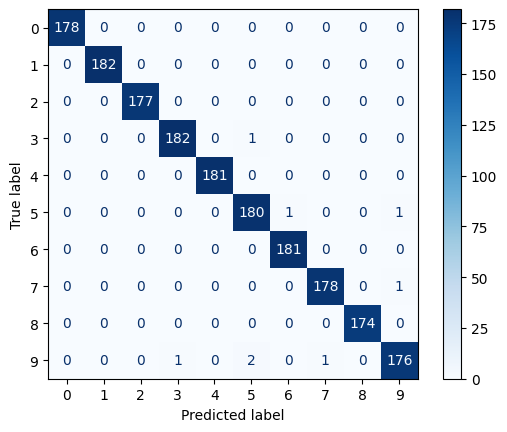

In [100]:
import matplotlib.pyplot as plt

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [109]:
from sklearn.metrics import classification_report

target_names = [str(name) for name in digits.target_names]

report = classification_report(y, prediction, target_names=target_names)

In [112]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       0.99      0.99      0.99       183
           4       1.00      1.00      1.00       181
           5       0.98      0.99      0.99       182
           6       0.99      1.00      1.00       181
           7       0.99      0.99      0.99       179
           8       1.00      1.00      1.00       174
           9       0.99      0.98      0.98       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797

